**Assignment 1** \\
**Classification and Regression Methods**


---

Team Members:-
Tarun Gangadhar Vadaparthi ( 50592389 ) \\
Veera Venkata Kalyan Yendru (50602533)

Task 1 :  Data Analysis & Preprocessing

Data Sets:- \\
1)penguins.csv \\
2)dimond.csv \\
3)emissions_by_country.csv

Importing Necessary Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('penguins.csv')
data2 = pd.read_csv('diamond.csv')
data3 = pd.read_csv('emissions_by_country.csv')


In [3]:
print(data1.describe())
data1.head()

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [4]:
print(data2.describe())
data2.head()

       average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [5]:
print(data3.describe())
data3.head()

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data1.isnull().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

In [7]:
data2.isnull().sum()

Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64

In [8]:
data3.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [9]:
data1.dropna(inplace=True)

In [10]:
data1['species']=data1['species'].str.strip().str.lower().str.capitalize()
data1['island']=data1['island'].str.strip().str.lower().str.capitalize()


In [11]:
data1['species'].unique()
data1['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Example for flipper length
columns_to_check = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']
for column in columns_to_check:
    lower_bound, upper_bound = detect_outliers_iqr(data1, column)
    # Replace outliers with NaN
    data1[column] = data1[column].where((data1[column] >= lower_bound) & (data1[column] <= upper_bound), np.nan)

# Remove outliers
print("Cleaned DataFrame:\n", data1.describe())



Cleaned DataFrame:
        calorie requirement  average sleep duration  bill_length_mm  \
count           305.000000              305.000000      303.000000   
mean           5275.659016               10.508197       43.957096   
std            1064.219767                2.233293        5.514785   
min            3504.000000                7.000000       32.100000   
25%            4418.000000                9.000000       39.400000   
50%            5105.000000               10.000000       44.100000   
75%            6207.000000               12.000000       48.550000   
max            7197.000000               14.000000       59.600000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     304.000000         302.000000   305.000000   305.000000  
mean       17.201645         200.880795  4202.622951  2008.042623  
std         1.960845          14.118119   807.439507     0.816052  
min        13.100000         172.000000  2700.000000  2007.000000  
25%      

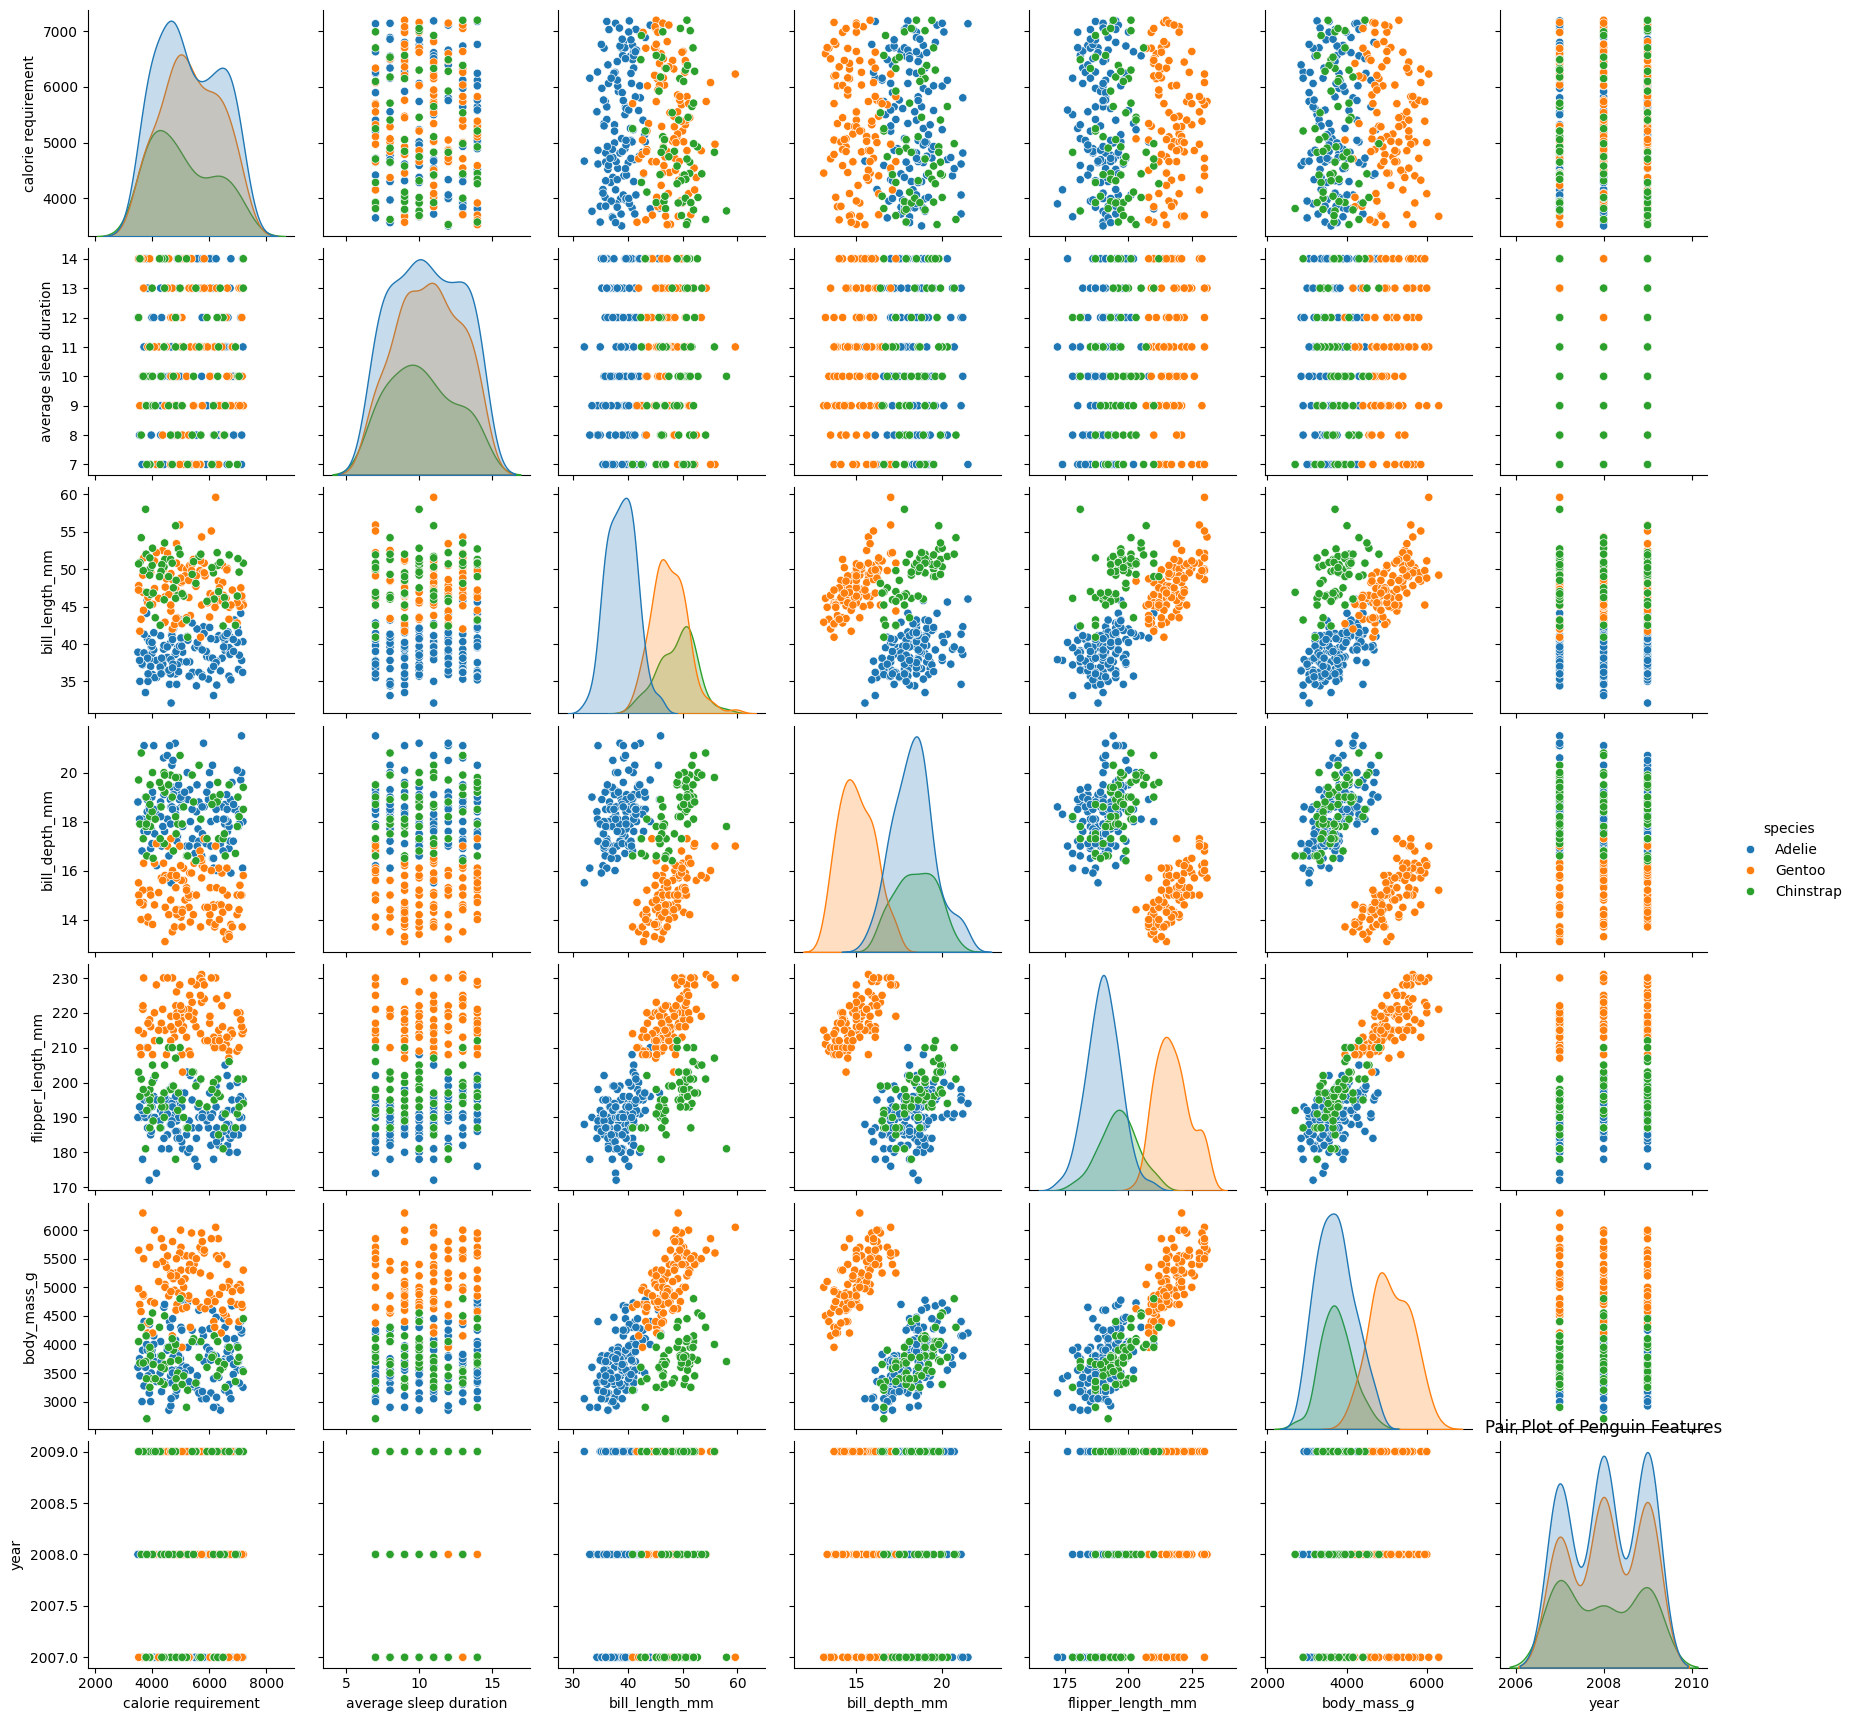

In [13]:
sns.pairplot(data1, hue='species')
plt.title('Pair Plot of Penguin Features')
plt.show()


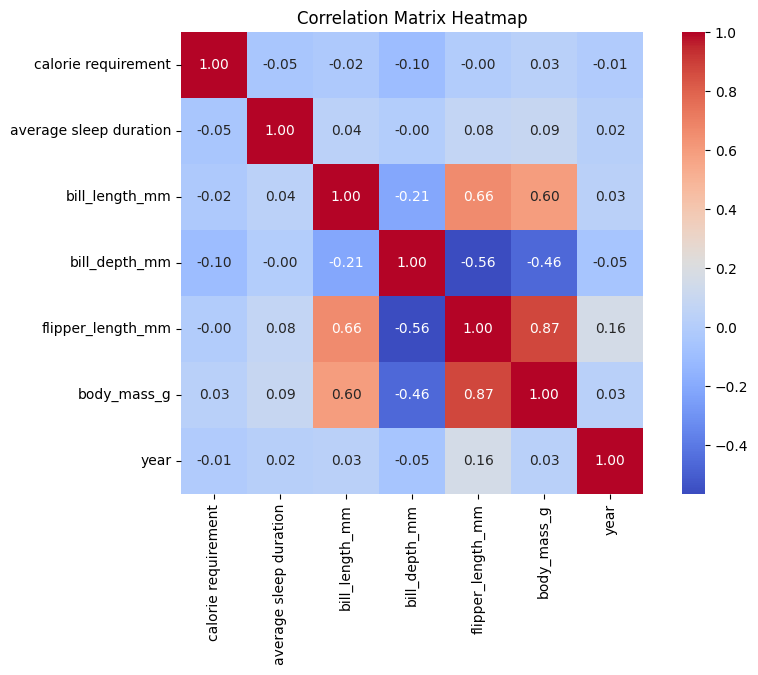

In [14]:
# First, make sure you have only numerical columns for correlation
numerical_df = data1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


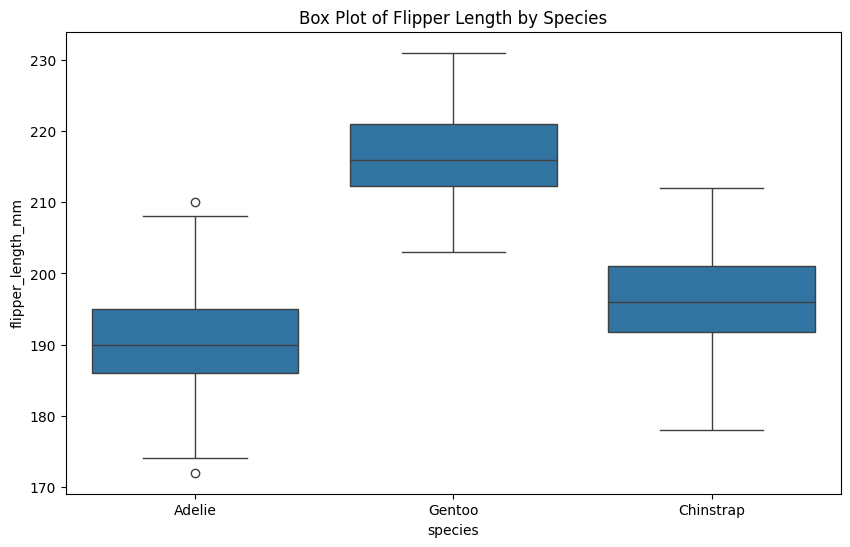

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=data1)
plt.title('Box Plot of Flipper Length by Species')
plt.show()


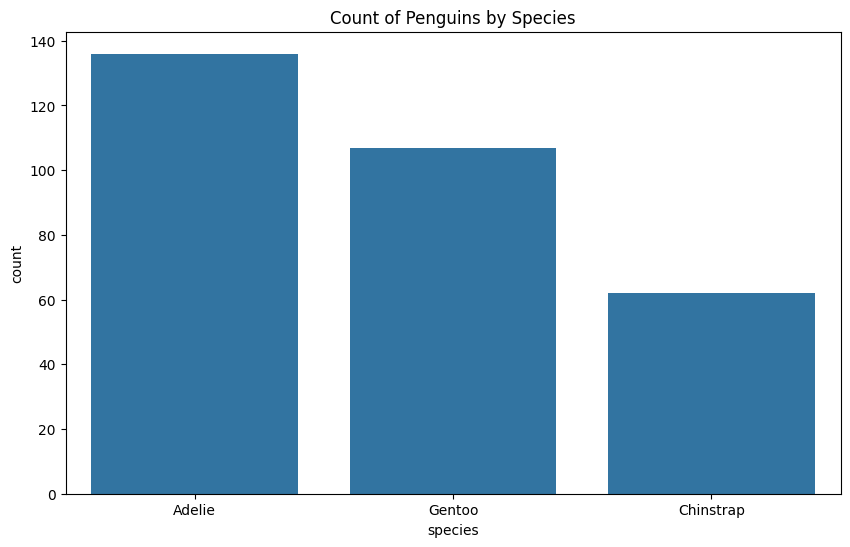

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=data1)
plt.title('Count of Penguins by Species')
plt.show()

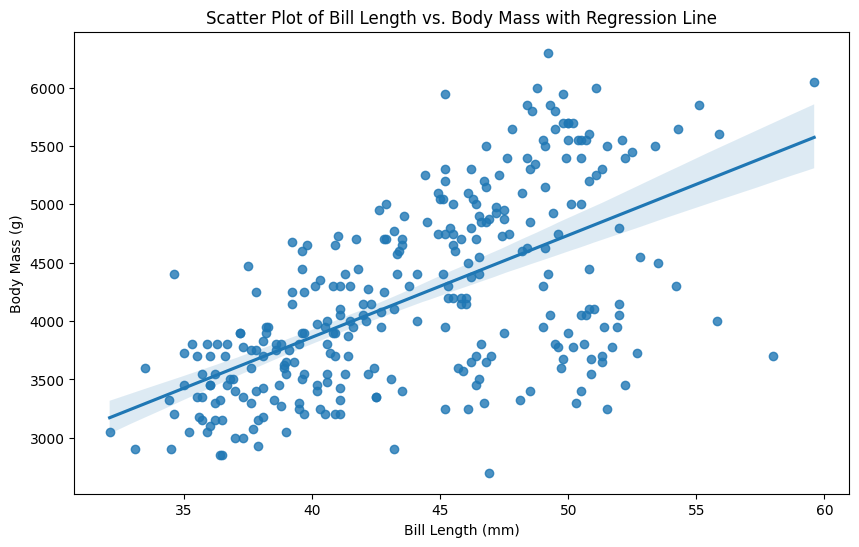

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bill_length_mm', y='body_mass_g', data=data1)
plt.title('Scatter Plot of Bill Length vs. Body Mass with Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


In [18]:
data1['gender'] = data1['gender'].map({'male': 1, 'female': 0})
numeric_data1 = data1.select_dtypes(include=['number'])
corr_matrix = numeric_data1.corr()
target_corr = corr_matrix['gender']
low_corr_features = target_corr[target_corr.abs() < 0.1].index.tolist()
print("Uncorrelated Features:", low_corr_features)
data1 = data1.drop(columns=low_corr_features)
print("DataFrame after dropping low correlation features:\n", data1.head())


Uncorrelated Features: ['calorie requirement', 'average sleep duration', 'year']
DataFrame after dropping low correlation features:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  gender  
0       3750.0       1  
1       3800.0       0  
2       3250.0       0  
4       3450.0       0  
5       3650.0       1  


In [19]:
data1 = pd.get_dummies(data1, columns=['species', 'island'])


In [20]:
# Normalize non-categorical features
numeric_cols = data1.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if col != 'gender':  # Assuming 'gender' is the target variable
        data1[col] = (data1[col] - data1[col].min()) / (data1[col].max() - data1[col].min())

# Check the normalized DataFrame
print("DataFrame after normalization:\n", data1.head())


DataFrame after normalization:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0        0.254545       0.666667           0.152542     0.291667       1   
1        0.269091       0.511905           0.237288     0.305556       0   
2        0.298182       0.583333           0.389831     0.152778       0   
4        0.167273       0.738095           0.355932     0.208333       0   
5        0.261818       0.892857           0.305085     0.263889       1   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0            True              False           False          False   
1            True              False           False          False   
2            True              False           False          False   
4            True              False           False          False   
5            True              False           False          False   

   island_Dream  island_Torgersen  
0         False              True  
1         Fa